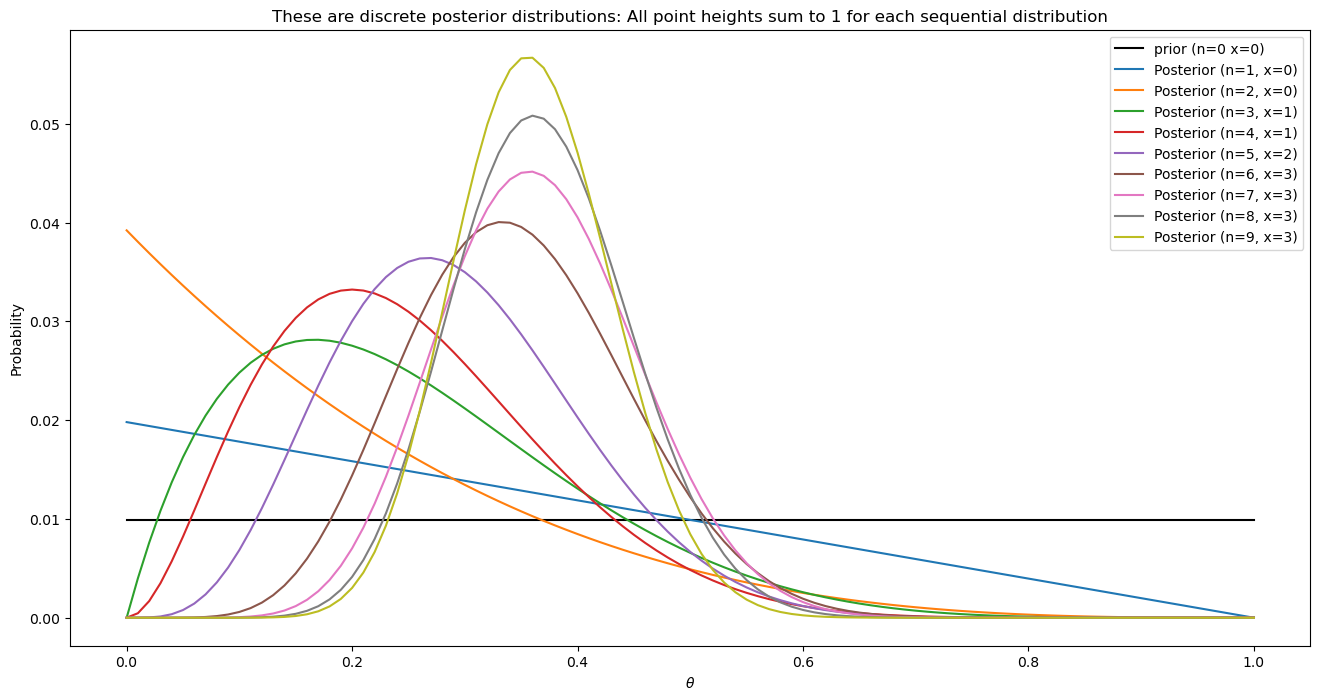

In [3]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.plot(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")
plt.xlabel(r"$\theta$")
plt.ylabel("Probability")


posterior = prior.copy()

for observation in observations:
    n += 1
    x += observation
    likelihood = stats.binom.pmf(x, n, parameter_domain)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    
    plt.plot(parameter_domain, posterior, label=f"Posterior (n={n}, x={x})")

    prior = posterior
    
plt.legend()
plt.show()


Q1: Distribution of the posterior and its parameterization?

The distribution of the posterior is the Beta distribution with the parameterization:
$$p(\theta | x, n) = Beta(\alpha = x + 1, \beta = n - x + 1)$$


Q2 Part 1:
    The distribution of the posterior follows a Beta distribution

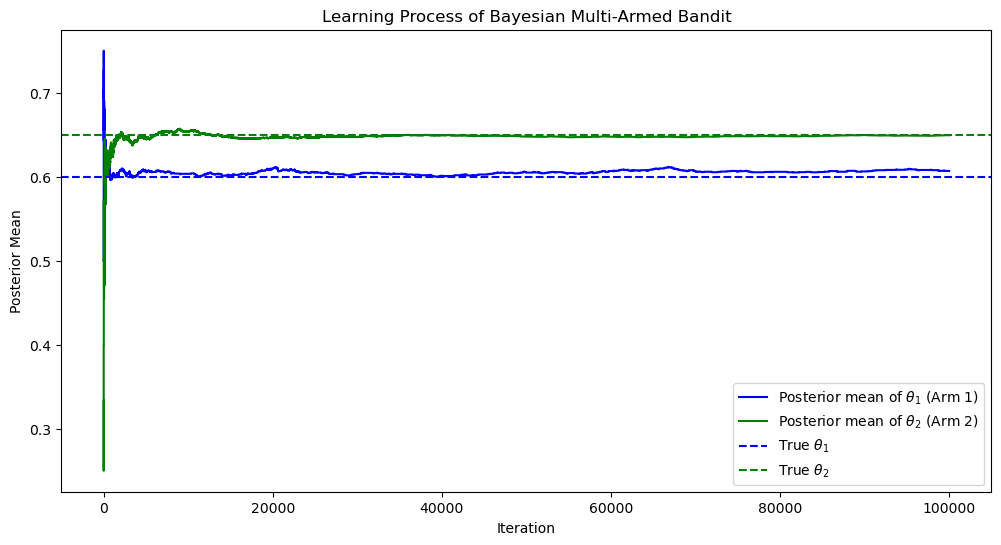

In [7]:
# Q2 Part 2 - 5

import numpy as np
import matplotlib.pyplot as plt


theta_true_1 = 0.6 
theta_true_2 = 0.65 


m = 100000

alpha_1, beta_1 = 1, 1 
alpha_2, beta_2 = 1, 1 


success_1, pulls_1 = 0, 0
success_2, pulls_2 = 0, 0

posterior_means_1 = []
posterior_means_2 = []

for t in range(m):
    sampled_theta_1 = np.random.beta(alpha_1, beta_1)
    sampled_theta_2 = np.random.beta(alpha_2, beta_2)

    if sampled_theta_1 > sampled_theta_2:
        reward = np.random.rand() < theta_true_1 
        pulls_1 += 1
        success_1 += reward
        alpha_1 += reward
        beta_1 += 1 - reward
    else:
        reward = np.random.rand() < theta_true_2
        pulls_2 += 1
        success_2 += reward
        alpha_2 += reward
        beta_2 += 1 - reward

    posterior_means_1.append(alpha_1 / (alpha_1 + beta_1))
    posterior_means_2.append(alpha_2 / (alpha_2 + beta_2))

plt.figure(figsize=(12, 6))
plt.plot(posterior_means_1, label=r"Posterior mean of $\theta_1$ (Arm 1)", color="blue")
plt.plot(posterior_means_2, label=r"Posterior mean of $\theta_2$ (Arm 2)", color="green")
plt.axhline(y=theta_true_1, color="blue", linestyle="--", label=r"True $\theta_1$")
plt.axhline(y=theta_true_2, color="green", linestyle="--", label=r"True $\theta_2$")
plt.title("Learning Process of Bayesian Multi-Armed Bandit")
plt.xlabel("Iteration")
plt.ylabel("Posterior Mean")
plt.legend()
plt.show()


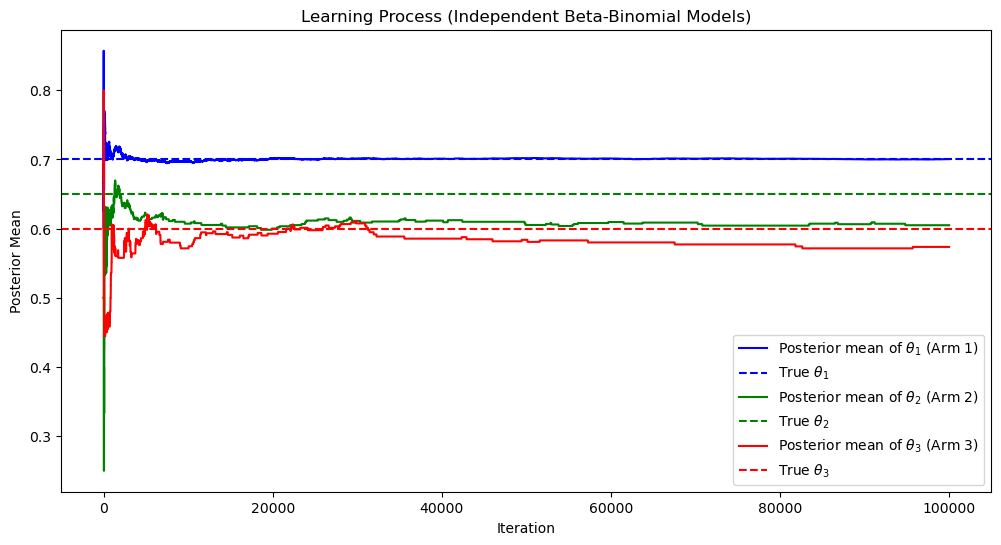

In [13]:
# Q3 Part 1
import numpy as np
import matplotlib.pyplot as plt

theta_true = [0.7, 0.65, 0.6]

m = 100000

alphas = [1, 1, 1]
betas = [1, 1, 1]

successes = [0, 0, 0]
pulls = [0, 0, 0]
posterior_means = [[], [], []]

for t in range(m):
    sampled_thetas = [np.random.beta(alphas[i], betas[i]) for i in range(3)]
    chosen_arm = np.argmax(sampled_thetas)
    reward = np.random.rand() < theta_true[chosen_arm]
    pulls[chosen_arm] += 1
    successes[chosen_arm] += reward
    alphas[chosen_arm] += reward
    betas[chosen_arm] += 1 - reward
    for i in range(3):
        posterior_means[i].append(alphas[i] / (alphas[i] + betas[i]))

plt.figure(figsize=(12, 6))
colors = ["blue", "green", "red"]
for i in range(3):
    plt.plot(posterior_means[i], label=f"Posterior mean of $\\theta_{i+1}$ (Arm {i+1})", color=colors[i])
    plt.axhline(y=theta_true[i], color=colors[i], linestyle="--", label=f"True $\\theta_{i+1}$")
plt.title("Learning Process (Independent Beta-Binomial Models)")
plt.xlabel("Iteration")
plt.ylabel("Posterior Mean")
plt.legend()
plt.show()


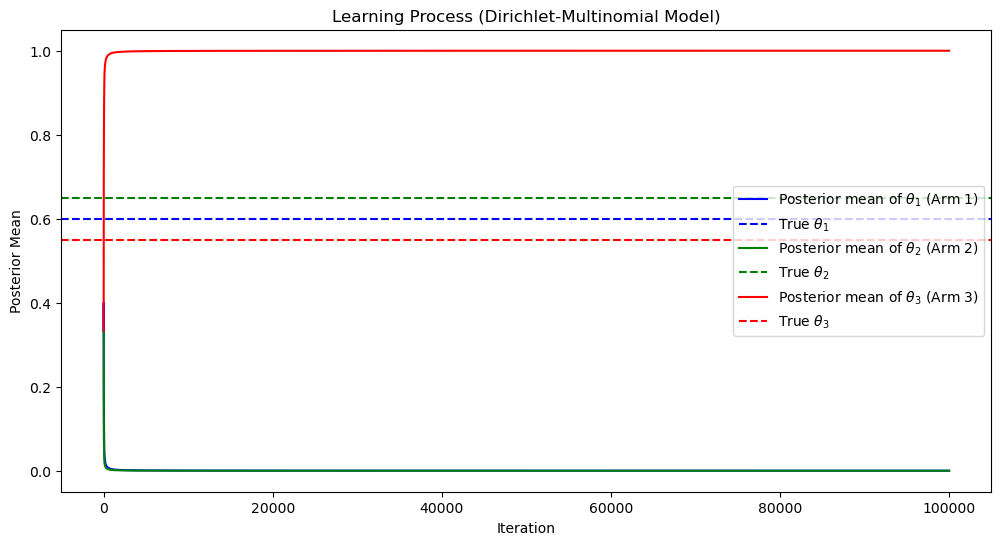

In [19]:
# Q3 Part 2
import numpy as np
import matplotlib.pyplot as plt

theta_true = [0.6, 0.65, 0.55]

m = 100000

alpha_dirichlet = np.ones(3)


posterior_means_dirichlet = [[] for _ in range(3)]

for t in range(m):
    sampled_thetas = np.random.dirichlet(alpha_dirichlet)
    
    chosen_arm = np.argmax(sampled_thetas)
    reward = np.random.rand() < theta_true[chosen_arm]
    alpha_dirichlet[chosen_arm] += reward

    posterior_means = alpha_dirichlet / alpha_dirichlet.sum()
    for i in range(3):
        posterior_means_dirichlet[i].append(posterior_means[i])
        
plt.figure(figsize=(12, 6))
colors = ["blue", "green", "red"]
for i in range(3):
    plt.plot(posterior_means_dirichlet[i], label=f"Posterior mean of $\\theta_{i+1}$ (Arm {i+1})", color=colors[i])
    plt.axhline(y=theta_true[i], color=colors[i], linestyle="--", label=f"True $\\theta_{i+1}$")
plt.title("Learning Process (Dirichlet-Multinomial Model)")
plt.xlabel("Iteration")
plt.ylabel("Posterior Mean")
plt.legend()
plt.show()

